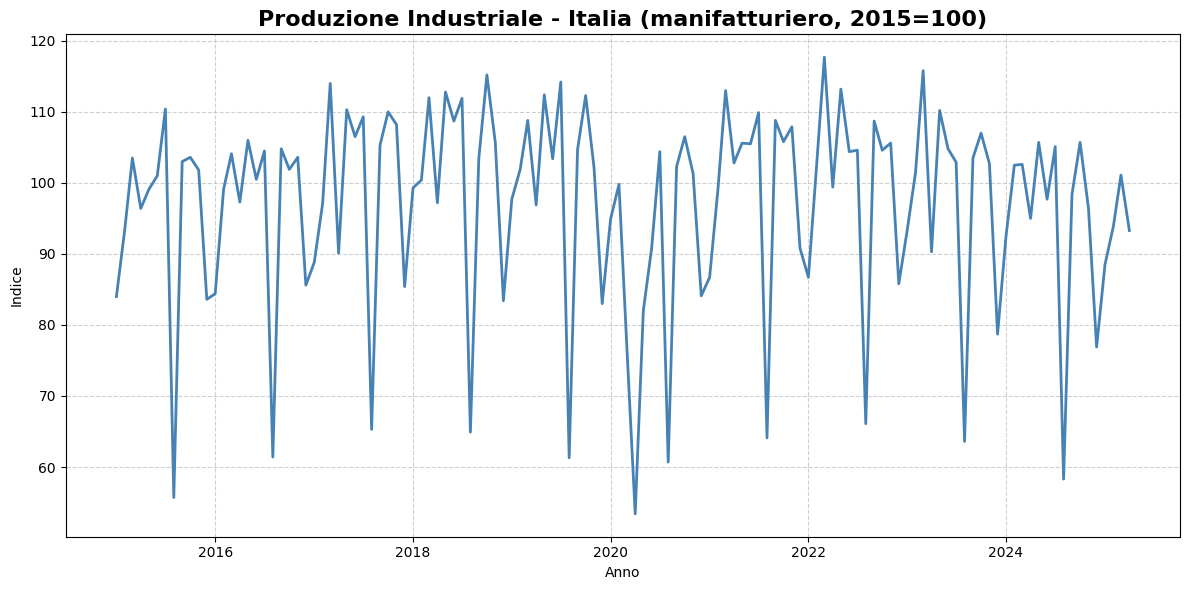

In [26]:
import sdmx
import pandas as pd
import matplotlib.pyplot as plt

# Crea il client Eurostat SDMX
estat = sdmx.Client('ESTAT')

# Richiedi i dati STS_INPR_M
response = estat.get(
    resource_type='data',
    resource_id='STS_INPR_M',
    key={
        'freq': 'M',
        'unit': 'I21',
        's_adj': 'NSA',
        'nace_r2': 'C',
        'geo': 'IT'
    },
    params={'startPeriod': '2015'}
)

# Estrai il dataset
dataset = response.data[0] if isinstance(response.data, list) else response.data

# Prendi la prima serie (dict key → list of Observation)
obs_list = list(dataset.series.values())[0]

# Estrai dati: attenzione, TIME_PERIOD è un oggetto, serve .value
data = []
for obs in obs_list:
    time_str = obs.dimension['TIME_PERIOD'].value  # ← finalmente quello giusto!
    value_str = obs.value
    if value_str is not None:
        data.append({
            'time': pd.to_datetime(time_str),
            'value': float(value_str)
        })

# Crea il DataFrame ordinato
df = pd.DataFrame(data).sort_values('time')

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['value'], color='steelblue', linewidth=2)
plt.title("Produzione Industriale - Italia (manifatturiero, 2015=100)", fontsize=16, fontweight='bold')
plt.xlabel("Anno")
plt.ylabel("Indice")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
print("Tipo di dataset.series:", type(dataset.series))
print("Contenuto di dataset.series:", dataset.series)

# Se è una lista, mostriamo il primo elemento
if isinstance(dataset.series, list):
    print("Tipo primo elemento:", type(dataset.series[0]))
    print("Contenuto primo elemento:", dataset.series[0])
elif isinstance(dataset.series, dict):
    print("Chiavi:", list(dataset.series.keys()))
    print("Valori:", list(dataset.series.values())[0])
else:
    print("Struttura non riconosciuta.")


Tipo di dataset.series: <class 'sdmx.dictlike.DictLike'>
Contenuto di dataset.series: {<SeriesKey: freq=M, indic_bt=PRD, nace_r2=C, s_adj=NSA, unit=I21, geo=IT>: [Observation(attached_attribute={}, series_key=<SeriesKey: freq=M, indic_bt=PRD, nace_r2=C, s_adj=NSA, unit=I21, geo=IT>, dimension=<Key: TIME_PERIOD=2015-01>, value='84.0', group_keys=set(), value_for=None), Observation(attached_attribute={}, series_key=<SeriesKey: freq=M, indic_bt=PRD, nace_r2=C, s_adj=NSA, unit=I21, geo=IT>, dimension=<Key: TIME_PERIOD=2015-02>, value='93.5', group_keys=set(), value_for=None), Observation(attached_attribute={}, series_key=<SeriesKey: freq=M, indic_bt=PRD, nace_r2=C, s_adj=NSA, unit=I21, geo=IT>, dimension=<Key: TIME_PERIOD=2015-03>, value='103.5', group_keys=set(), value_for=None), Observation(attached_attribute={}, series_key=<SeriesKey: freq=M, indic_bt=PRD, nace_r2=C, s_adj=NSA, unit=I21, geo=IT>, dimension=<Key: TIME_PERIOD=2015-04>, value='96.4', group_keys=set(), value_for=None), Obse